https://en.wikipedia.org/wiki/Lorenz_system

In [2]:
using ReachabilityAnalysis, Plots

@taylorize function lorenz!(dx, x, params, t)
    local σ = 10.0
    local β = 8.0 / 3.0
    local ρ = 28.0
    dx[1] = σ * (x[2] - x[1])
    dx[2] = x[1] * (ρ - x[3]) - x[2]
    dx[3] = x[1] * x[2] - β * x[3]
    return dx
end

In [3]:
X0 = Hyperrectangle(low=[0.9, 0.0, 0.0], high=[1.1, 0.0, 0.0])
prob = @ivp(x' = lorenz!(x), dim=3, x(0) ∈ X0);

In [5]:
alg = TMJets(abs_tol=1e-15, orderT=10, orderQ=2, max_steps=50_000);

@time sol = solve(prob, T=10.0, alg=alg);
solz = overapproximate(sol, Zonotope);

  4.120787 seconds (36.04 M allocations: 2.751 GiB, 18.34% gc time)


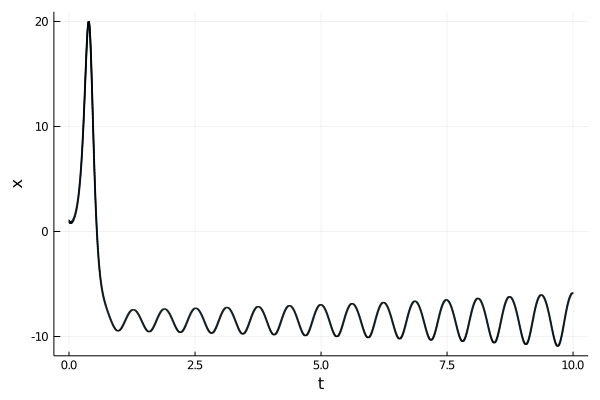

In [6]:
plot(solz, vars=(0, 1), xlab="t", ylab="x")

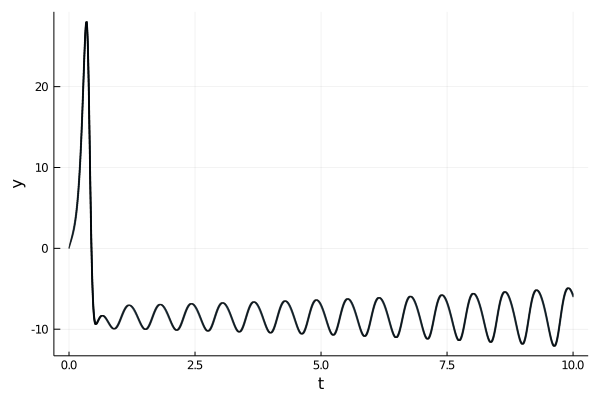

In [7]:
plot(solz, vars=(0, 2), xlab="t", ylab="y")

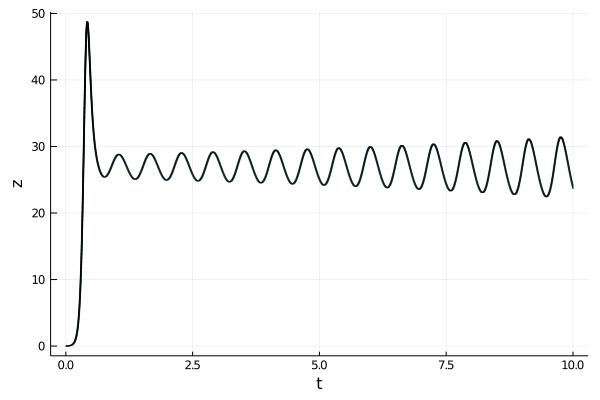

In [8]:
plot(solz, vars=(0, 3), xlab="t", ylab="z")